# GridBasedDBSCAN + Gaussian Mixture Model

Applies GridBasedDBSCAN on the space-time features, then applies GMM to separate 
clusters based on velocity and width. Takes 5-10 minutes. Not yet clear if 
it's any better than DBSCAN + GMM.

Parameters for each algorithm are set to default values (shown below), but can 
be modified using the class constructor.

### Optional arguments for GridbasedDBSCAN_GMM class constructor

#### GridBasedDBSCAN
     f=0.2
        Used to calculate the width of the search area at a given range gate:
          beam_eps = g / (f * radial_dist / angular_dist)
        Best values for our data are typically f=0.1-0.4

     g=1
         See above formula.
         Best values for our data are typically g=1-3
         
     pts_ratio=0.3
         The ratio of (actual observations) / (possible observations) for points
         to be considered part of a core cluster.
         Since the search area changes size, this parameter is used instead of
         DBSCAN's MinPts. Possible observations is the number of points that
         could appear within the search area, so pts_ratio=0.3 means 30% of
         the search area needs to contain points in order to create a core
         cluster.
     
     dr=45
         The distance between each range gate (for SuperDARN radars, 45 km).
         Make sure units are consistent with r_init.
     
     dtheta=3.24
         The angular difference between each beam, in degrees.
     
     r_init=180
         The distance to the first range gate (for SuperDARN radars, 180km).
         Make sure units are consistent with dr.
     
     scan_eps=1
         Determines the scan number radius of the search area for GridBasedDBSCAN. 
         If this is 1, two points must come from adjacent scans (i.e., both from 
         beam 3 in 2 subsequent measurements) to be considered neighbors.
         
#### GMM
     n_clusters=5
         The number of GMM clusters to create within each large (>500pts) 
         GridBasedDBSCAN cluster.
         
     cov='full'
         The covariance matrix to use for GMM.
         See this post for more details: 
         https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models
         
     features=['beam', 'gate', 'time', 'vel', 'wid'] 
         Names of the features for GMM to run on. Can also include 'elv'.
         
     BoxCox=False
         If BoxCox=True, 'wid' and 'vel' will be BoxCox transformed to convert 
         them from an exponential distribution to a Gaussian.

In [2]:
import sys
sys.path.insert(0, '..')
from algorithms.grid_based_dbscan_gmm import GridBasedDBSCAN_GMM
import datetime

start_time = datetime.datetime(2017, 4, 4)
end_time = datetime.datetime(2017, 4, 5)
gbdb_gmm = GridBasedDBSCAN_GMM(start_time, end_time, 'cvw', load_model=True, save_model=False)
print(gbdb_gmm.runtime)

530.6888008117676


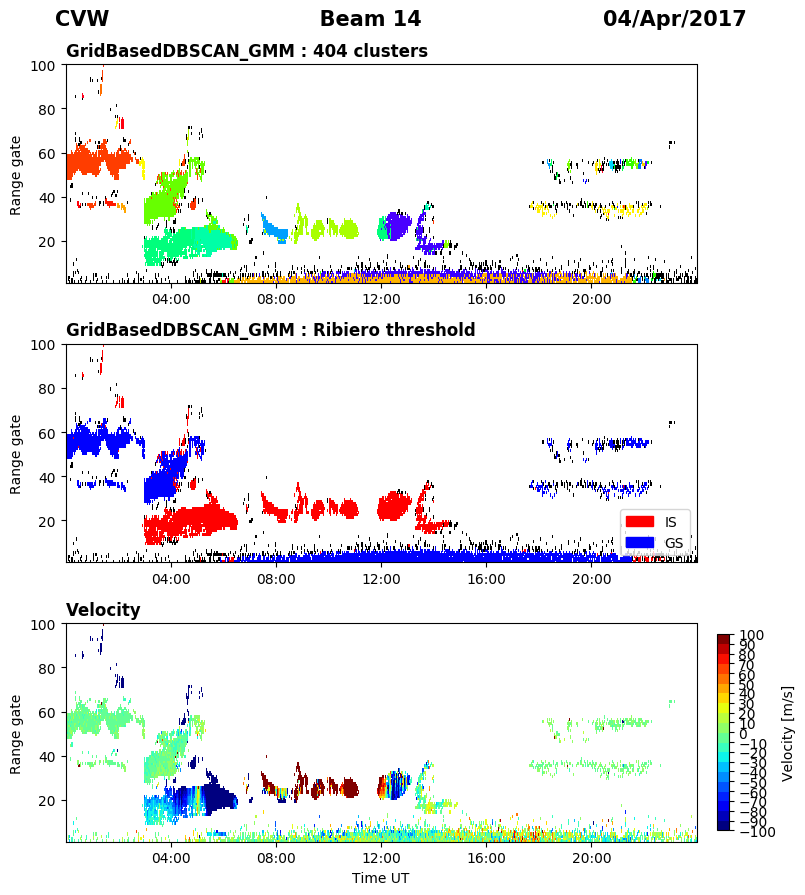

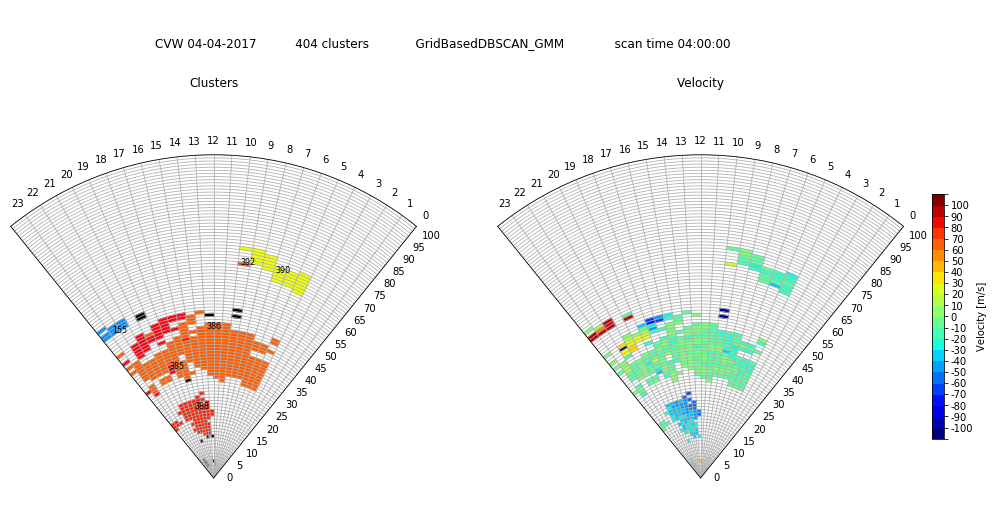

In [3]:
# Make RTI plots to compare AJ's threshold with traditional threshold
gbdb_gmm.plot_rti(14, 'Ribiero', save_fig=True, vel_max=100, vel_step=10)
fanplot_start =  datetime.datetime(2017, 4, 4, 4, 0, 0)
fanplot_end =  datetime.datetime(2017, 4, 4, 4, 0, 0)
gbdb_gmm.plot_fanplots(fanplot_start, fanplot_end, save_fig=True, vel_max=100, vel_step=10)